In [1]:
from google.colab import files
uploaded = files.upload()

Saving hotel_bookings - hotel_bookings.csv to hotel_bookings - hotel_bookings.csv


In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Phase 1 :** Exploratory Data Analysis (EDA) & Data Quality Report

In [49]:
# Load Dataset
df = pd.read_csv('hotel_bookings - hotel_bookings.csv')
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [50]:
# Dataset shape
df.shape

(119390, 32)

In [51]:
# Summary statistics
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [52]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [53]:
# categorical columns
cat_cols = df.select_dtypes('object').columns.tolist()
print(f'Categorical columns : {cat_cols}')

Categorical columns : ['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status', 'reservation_status_date']


In [54]:
# unique values
for col in cat_cols:
  print(f'{col} : {df[col].unique()}')

hotel : ['Resort Hotel' 'City Hotel']
arrival_date_month : ['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
meal : ['BB' 'FB' 'HB' 'SC' 'Undefined']
country : ['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'JOR' 'SYR' 'SGP' 'BDI'
 'SAU' 'VNM' 'PLW' 'QAT' 'EGY' 'PER' 'MLT' 'MWI' 'ECU' 'MDG' 'ISL' 'UZB'
 'NPL' 'BHS' 'MAC' 'TGO' 'TWN' 'DJI' 'STP' 'KNA' '

In [55]:
# numerical columns
num_cols = df.select_dtypes(['int64', 'float64']).columns.tolist()
print(f'Numerical columns : {num_cols}')

Numerical columns : ['is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']


In [56]:
# Summary statistics
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [57]:
# null in each col
df.isnull().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


In [58]:
# % of null values in whole dataset
missing_values = df.isnull().sum()
total_cells = np.prod(df.shape)
total_missing = missing_values.sum()
print(f'Percentage of missing values : {total_missing / total_cells * 100} ')

Percentage of missing values : 3.387663330262166 


In [59]:
# % of null values in each column
percent_missing_per_col = (missing_values / len(df)) * 100
percent_missing_per_col

,0
hotel,0.000000
is_canceled,0.000000
lead_time,0.000000
arrival_date_year,0.000000
arrival_date_month,0.000000
arrival_date_week_number,0.000000
arrival_date_day_of_month,0.000000
stays_in_weekend_nights,0.000000
stays_in_week_nights,0.000000
adults,0.000000


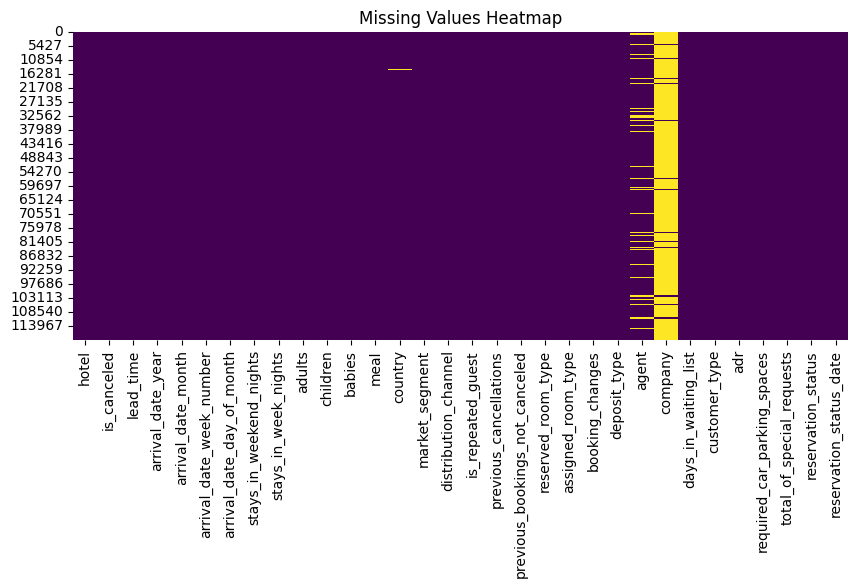

In [60]:
# Visuallize the null values per col
plt.figure(figsize=(10, 4))
sns.heatmap(df.isnull(), cbar=False , cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()

In [61]:
num_cols

['is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'agent',
 'company',
 'days_in_waiting_list',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests']

In [62]:
# IQR DETECTION FOR COLUMNS
outlier_columns = ['lead_time' , 'adr' , 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies' ]

def detect_outliers_iqr(series):
  Q1 = series.quantile(0.25)
  Q3 = series.quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - (1.5 * IQR)
  upper_bound = Q3 + (1.5 * IQR)
  outliers = series[(series < lower_bound) | (series > upper_bound)]
  return outliers

for col in outlier_columns :
    outliers = detect_outliers_iqr(df[col])
    print(f"{col}: {len(outliers)} outliers ({len(outliers)/len(df)*100:.2f}%)")


lead_time: 3005 outliers (2.52%)
adr: 3793 outliers (3.18%)
stays_in_weekend_nights: 265 outliers (0.22%)
stays_in_week_nights: 3354 outliers (2.81%)
adults: 29710 outliers (24.88%)
children: 8590 outliers (7.19%)
babies: 917 outliers (0.77%)


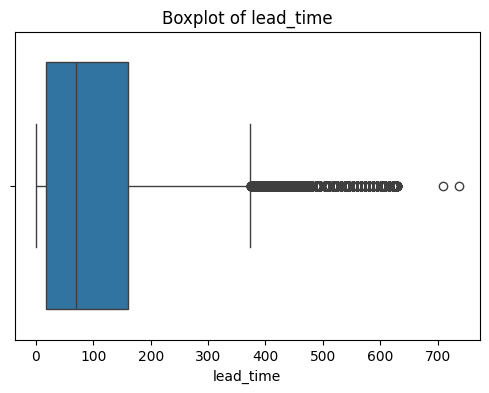

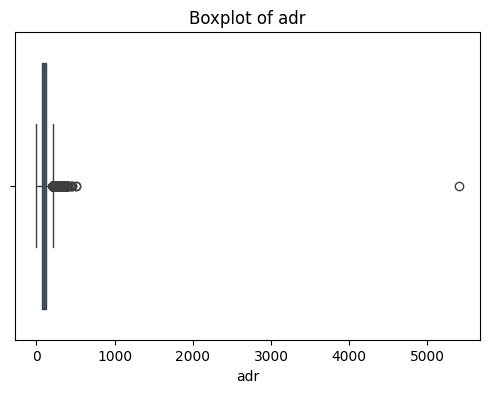

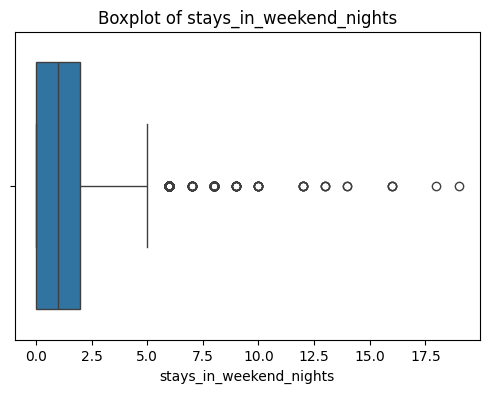

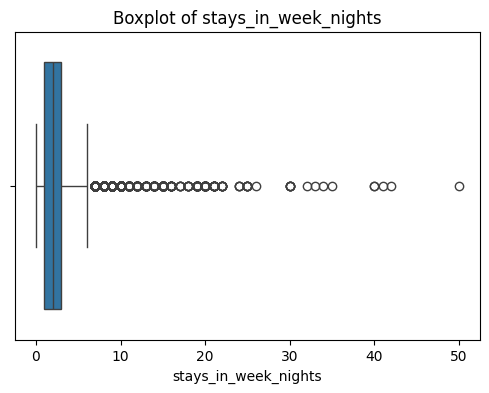

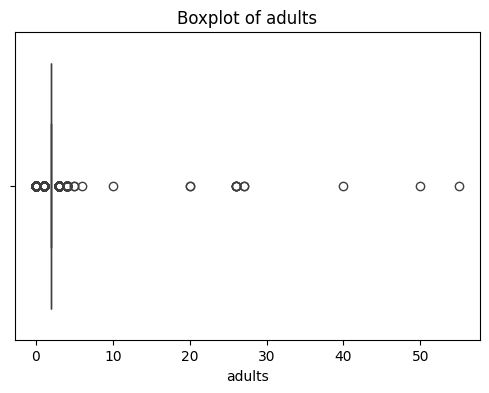

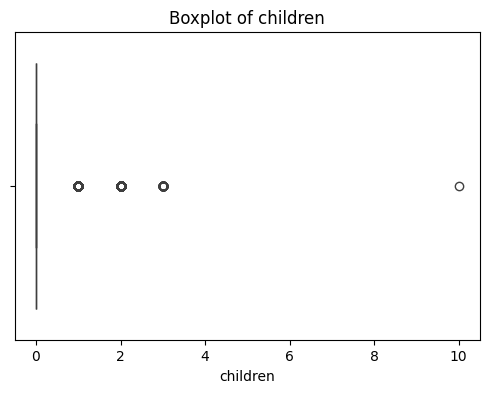

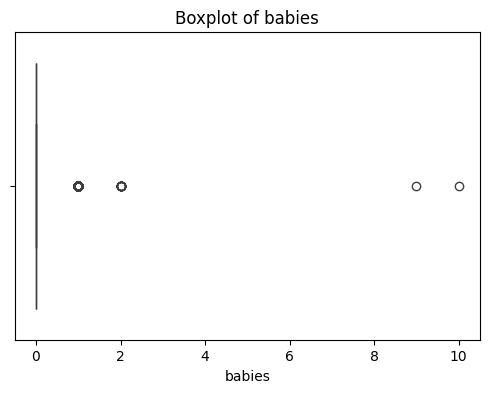

In [63]:
# Visualize the outliers and the percent for some cols
for col in outlier_columns :
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

## **Findings – Data Quality Issues**
**1. Missing values**
      

*   several columns has (NAN) values
*   The heatmap showed the missin values not ot uniformly distributed in columns but concentrated in specific columns e.g (Country , Agent , coutry)
*   these columns must be filled before modeling phase

**2. Outliers**


*   Outlier detection using Boxplots and the IQR method revealed:

    - lead_time → ~2.5% outliers (very long booking lead times).

    - adr → ~3.2% outliers (extreme/unrealistic prices).

    - stays_in_week_nights → ~2.8% outliers (very long stays).

    - adults → ~25% outliers (unrealistic values such as 50 adults in one booking, likely data entry errors).

    - children → ~7% outliers (unusually high number of children).

    - babies → ~0.77% outliers (rare unrealistic cases, e.g., bookings with 10 babies).
  
*   Columns that have small perecent can be acceptable
*   Columns that have high has a real issue

**3. General OBS**
*   Some numerical columns doesn't need a quantitive analysis like IDs (agent , company)
*   Calendar-related columns (arrival_date_year, arrival_date_week_number, arrival_date_day_of_month) are categorical/time-based, not continuous numerical measures, so outlier detection is not meaningful here.

*   Overall, the dataset is rich but requires data cleaning (handling missing values and outliers) before moving into feature engineering or modeling.

## Summary OBS
*   The quality issues are represented in :
    1. The outliers in dataset that must be cleansed
    2. datatypes of features that needed to be revised again
    3. Missing values in columns


# **Phase 2** : Data Cleaning

## 1. handle missing values


In [64]:
df['country'].fillna(df['country'].mode()[0] , inplace=True)

/tmp/ipython-input-2493431333.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['country'].fillna(df['country'].mode()[0] , inplace=True)


In [65]:
df['company'].fillna(0 , inplace=True)
df['agent'].fillna(0 , inplace=True)

/tmp/ipython-input-2788647803.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['company'].fillna(0 , inplace=True)
/tmp/ipython-input-2788647803.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.me

In [66]:
df['children'] = df['children'].fillna(df['children'].median())

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119390 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

## 2. Duplicate values


In [68]:
# check duplicates
df.duplicated().sum()

np.int64(32013)

In [69]:
# drop duplicates
df.drop_duplicates(inplace=True)

In [70]:
# check duplicates
df.duplicated().sum()

np.int64(0)

## 3. Handle Outliers


In [71]:
def handle_outliers_iqr(series):
  Q1 = series.quantile(0.25)
  Q3 = series.quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - (1.5 * IQR)
  upper_bound = Q3 + (1.5 * IQR)
  series[series < lower_bound] = lower_bound
  series[series > upper_bound] = upper_bound
  return series


In [72]:
# handle children outlier
df['children'] = handle_outliers_iqr(df['children'])

/tmp/ipython-input-1854289669.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  series[series < lower_bound] = lower_bound
/tmp/ipython-input-1854289669.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  series[series > upper_bound] = upper_bound


In [73]:
outliers = detect_outliers_iqr(df['children'])
print(f"Children column: {len(outliers)} outliers ({len(outliers)/len(df)*100:.2f}%)")

Children column: 0 outliers (0.00%)


In [74]:
# handle children outlier
df['adults'] = handle_outliers_iqr(df['adults'])

/tmp/ipython-input-1854289669.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  series[series < lower_bound] = lower_bound
/tmp/ipython-input-1854289669.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  series[series > upper_bound] = upper_bound


In [75]:
df.loc[df['adults'] == 0, 'adults'] = 1

In [76]:
outliers = detect_outliers_iqr(df['adults'])
print(f"adults column: {len(outliers)} outliers ({len(outliers)/len(df)*100:.2f}%)")

adults column: 0 outliers (0.00%)


## 4. Fix data types of date


In [77]:
# fix arrival date
df['arrival_date_month'] = pd.to_datetime(df['arrival_date_month'], format='%B').dt.month

In [78]:
df['arrival_date'] = pd.to_datetime(
    df[['arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month']]
      .rename(columns={
          'arrival_date_year': 'year',
          'arrival_date_month': 'month',
          'arrival_date_day_of_month': 'day'
      })
)
df['arrival_date']

,arrival_date
0,2015-07-01
1,2015-07-01
2,2015-07-01
3,2015-07-01
4,2015-07-01
...,...
119385,2017-08-30
119386,2017-08-31
119387,2017-08-31
119388,2017-08-31


## 5. Drop critical columms


In [79]:
# drop the columns reservation_status and reservation_status_date.
df.drop(columns=['reservation_status' , 'reservation_status_date'], inplace= True)

# **Phase 3** : Feature Engineering & Preprocessing

## 1. Create New Features:


In [80]:
df['total guests'] = df['adults'] + df['children'] + df['babies']
df[['total guests' , 'adults' , 'children' , 'babies']].sample(5)

,total guests,adults,children,babies
3047,2.0,2,0.0,0
101003,2.0,2,0.0,0
32036,2.0,2,0.0,0
22226,2.0,2,0.0,0
35299,2.0,2,0.0,0


In [81]:
df['total nights'] = df['stays_in_week_nights'] + df['stays_in_weekend_nights']
df[['total nights' , 'stays_in_week_nights' , 'stays_in_weekend_nights']].sample(5)

,total nights,stays_in_week_nights,stays_in_weekend_nights
12438,1,1,0
106410,5,4,1
80984,0,0,0
112346,3,1,2
99467,5,3,2


In [82]:
df['is_family'] = (df['adults'] > 1) & ((df['babies'] > 0) | (df['children'] > 0))
df[['is_family' , 'adults' , 'children' , 'babies']].sample(5)

,is_family,adults,children,babies
89428,False,2,0.0,0
615,False,2,0.0,0
22441,False,2,0.0,0
51785,False,2,0.0,0
84542,False,2,0.0,0


## 2. Encode Categorical Variables:

In [83]:
# one hot encoder
low_cardinality = ['meal' , 'market_segment' , 'distribution_channel']
df = pd.get_dummies(df , columns= low_cardinality , drop_first= True)

In [84]:
for col in df.select_dtypes(include=['bool']).columns:
    if col != 'is_family':
        df[col] = df[col].astype(int)
        print(f"{col} : {df[col].unique()}")

meal_FB : [0 1]
meal_HB : [0 1]
meal_SC : [0 1]
meal_Undefined : [0 1]
market_segment_Complementary : [0 1]
market_segment_Corporate : [0 1]
market_segment_Direct : [1 0]
market_segment_Groups : [0 1]
market_segment_Offline TA/TO : [0 1]
market_segment_Online TA : [0 1]
market_segment_Undefined : [0 1]
distribution_channel_Direct : [1 0]
distribution_channel_GDS : [0 1]
distribution_channel_TA/TO : [0 1]
distribution_channel_Undefined : [0 1]


In [86]:
# frequency encoding
country_counts = df['country'].value_counts()
df['country_encoded'] = df['country'].map(country_counts)
df[['country','country_encoded']]

,country,country_encoded
0,PRT,27886
1,PRT,27886
2,GBR,10433
3,GBR,10433
4,GBR,10433
...,...,...
119385,BEL,2081
119386,FRA,8837
119387,DEU,5387
119388,GBR,10433


In [87]:
country_counts = df['country'].value_counts()
country_counts

,count
country,
PRT,27886
GBR,10433
FRA,8837
ESP,7252
DEU,5387
...,...
MRT,1
KIR,1
SDN,1


# Train and test

In [88]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2, random_state=42)
